In [224]:
%load_ext autoreload
%autoreload 2
from naml.dataset import Datasets, DatasetRemote
datasets = Datasets("~/naml-data")
import re

lines = datasets.fetch(DatasetRemote(
    "timemachine","http://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt"
)).readlines()

lines = [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]
lines[0], lines[10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


('the time machine by h g wells',
 'twinkled and his usually pale face was flushed and animated the')

In [225]:
from naml.text import Vocabulary
tokens = Vocabulary.tokenize_char(lines)
corpus = Vocabulary.to_corpus(tokens)
vocab = Vocabulary(corpus)

len(corpus), len(vocab)

(170580, 28)

## Zipf's Law
$$ n_i \propto \frac{1}{r_i} $$
where $n_i$ is the frequency of the $i$-th most frequent word and $r_i$ is the rank of the $i$-th most frequent word.

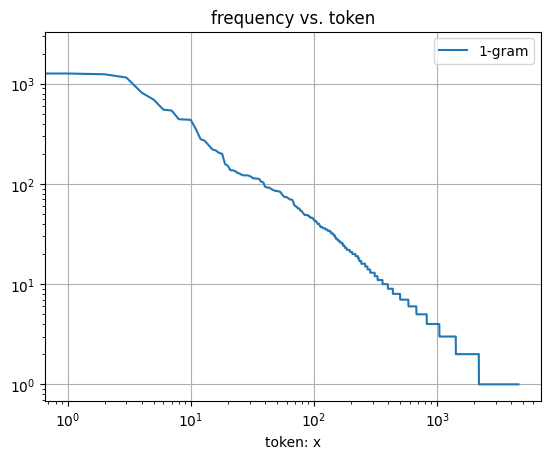

In [226]:
from naml import plot
from naml.modules import torch

tokens = Vocabulary.tokenize(lines)
corpus = Vocabulary.to_corpus(tokens)
vocab = Vocabulary(corpus)
freqs = vocab.freqs(vocab.top_tokens)
plot.simple([freqs], scale_x="log", scale_y="log", label_x="token: x", labels_y=['1-gram'], title="frequency vs. token")

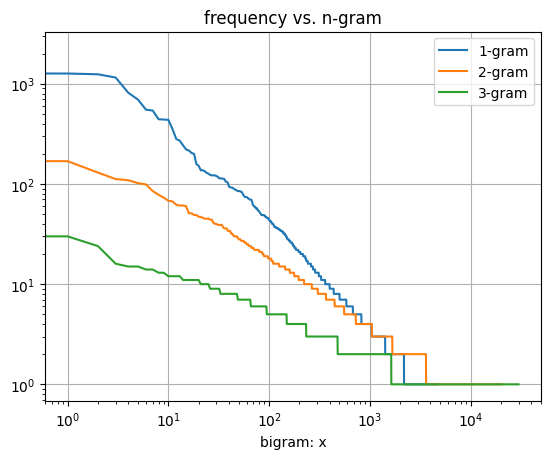

In [227]:
vocab = Vocabulary(list(zip(corpus[:-1], corpus[1:])))
bigram_freqs = vocab.freqs(vocab.top_tokens)
vocab = Vocabulary(list(zip(corpus[:-2], corpus[1:-1], corpus[2:])))
trigram_freqs = vocab.freqs(vocab.top_tokens)
plot.simple([freqs, bigram_freqs,trigram_freqs], scale_x="log", scale_y="log", label_x="bigram: x", labels_y=['1-gram','2-gram','3-gram'], title="frequency vs. n-gram")

## Sampling

In [228]:
from naml.sequence import seq_partition_sample_random,seq_partition_sample_sequential

a = torch.arange(0, 35)
for X,Y in seq_partition_sample_random(a, 2, 5):
    print('X=',X)
    print('Y=',Y)
print('---')
for X,Y in seq_partition_sample_sequential(a, 2, 5):
    print('X=',X)
    print('Y=',Y)

X= tensor([[22, 23, 24, 25, 26],
        [27, 28, 29, 30, 31]])
Y= tensor([[23, 24, 25, 26, 27],
        [28, 29, 30, 31, 32]])
X= tensor([[ 2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11]])
Y= tensor([[ 3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12]])
X= tensor([[12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21]])
Y= tensor([[13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22]])
---
X= tensor([[ 2,  3,  4,  5,  6],
        [18, 19, 20, 21, 22]])
Y= tensor([[ 3,  4,  5,  6,  7],
        [19, 20, 21, 22, 23]])
X= tensor([[ 7,  8,  9, 10, 11],
        [23, 24, 25, 26, 27]])
Y= tensor([[ 8,  9, 10, 11, 12],
        [24, 25, 26, 27, 28]])
X= tensor([[12, 13, 14, 15, 16],
        [28, 29, 30, 31, 32]])
Y= tensor([[13, 14, 15, 16, 17],
        [29, 30, 31, 32, 33]])
